# Code for Naive Bayes model for subway opinion tweet data

Some segments of code partially adapted from Professor James Hickman's Wikipedia Crawler Example

Author: Alex Pattarini

This code vectorizes corpus of opinion tweets about the MTA, partitions into training/test sets, fits simple model based on probabilities in the data,and applies a Multinomial Naive Bayes model to make predictions based on sentiment analysis

In [292]:
# Import relevant packages
import pandas as pd
import numpy as np
import nltk
import os
import re
import math
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('words')
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\alexp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [293]:
# Read in unvectorized Opinion Tweet Data
df = pd.read_csv("../../data/01-modified-data/NYCT-Opinion-Tweets-Sentiments.csv")
df = df[df['category']!="neu"]

## Data Reformatting for Model Construction

In [294]:
# Convert df to list of strings
corpus = df['text'].tolist()

# Assign numerical codes to categories
df['category'] = pd.Categorical(df['category'])
df['label'] = df['category'].cat.codes
y1 = df['label'].to_numpy()
labels = ['neg','pos']

In [295]:
# Vectorize corpus text
vec = CountVectorizer(min_df=0.001)
all_x = vec.fit_transform(corpus)
X=np.array(all_x.todense())

# one hot encoding
max_x=np.max(X,axis=0)
X=np.ceil(X/max_x)

## Separate into train and test

In [296]:
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

## Random Model Construction based on Probabilities in the Data

In [297]:
# Model determined by probabilities of positive and negative in the training data
# proability of negative opinion in training data set
p_neg_train = len(y_train[y_train==0])/len(y_train)
#print(p_neg_train)
# Randomly drawn array from uniform distribution based on above probability that serves as a prediction
yp_train = np.random.choice(np.arange(0,2),p=[p_neg_train,1-p_neg_train],size=len(y_train))

# Predict based on same probability for test data set
yp_test = np.random.choice(np.arange(0,2),p=[p_neg_train,1-p_neg_train],size=len(y_test))

# Print classification report
print("CLASSIFICATION REPORT FOR TRAINING SET")
print(classification_report(y_train,yp_train,target_names=["neg","pos"]))
print("CLASSIFICATION REPORT FOR TEST SET")
print(classification_report(y_test,yp_test,target_names=["neg","pos"]))

CLASSIFICATION REPORT FOR TRAINING SET
              precision    recall  f1-score   support

         neg       0.42      0.43      0.42       169
         pos       0.54      0.53      0.54       215

    accuracy                           0.49       384
   macro avg       0.48      0.48      0.48       384
weighted avg       0.49      0.49      0.49       384

CLASSIFICATION REPORT FOR TEST SET
              precision    recall  f1-score   support

         neg       0.31      0.31      0.31        39
         pos       0.53      0.53      0.53        58

    accuracy                           0.44        97
   macro avg       0.42      0.42      0.42        97
weighted avg       0.44      0.44      0.44        97



## Confusion Matrix for Random Model

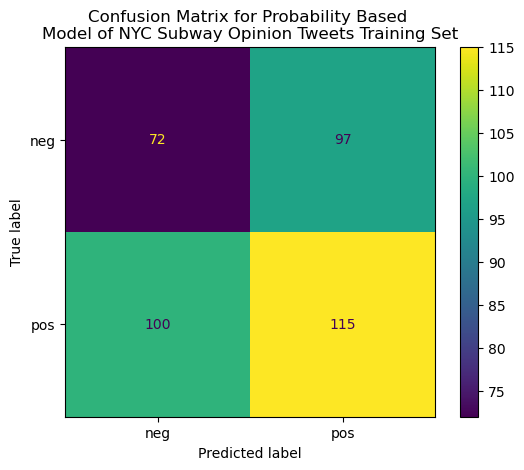

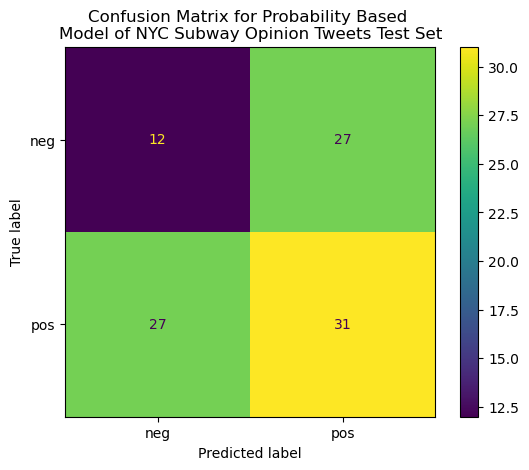

In [298]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# Training set
cm = confusion_matrix(y_train,yp_train)
cm_plot = ConfusionMatrixDisplay(cm,display_labels=labels)
cm_plot.plot()
plt.title("Confusion Matrix for Probability Based \nModel of NYC Subway Opinion Tweets Training Set")
plt.savefig("../../501-project-website/images/CONFUSION-MX-PBased-train-Opinion-Tweets.png")

# Test set
cm = confusion_matrix(y_test,yp_test)
cm_plot = ConfusionMatrixDisplay(cm,display_labels=labels)
cm_plot.plot()
plt.title("Confusion Matrix for Probability Based \nModel of NYC Subway Opinion Tweets Test Set")
plt.savefig("../../501-project-website/images/CONFUSION-MX-PBased-test-Opinion-Tweets.png")

## NB Model Construction

In [299]:
# Initialize and fit model
model = MultinomialNB()
model.fit(x_train,y_train)

# Save predictions for later plot use
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

#model_predict(model,yp_train,yp_test)

# Print classification report
print("CLASSIFICATION REPORT FOR TRAINING SET")
print(classification_report(y_train,yp_train,target_names=["neg","pos"]))
print("CLASSIFICATION REPORT FOR TEST SET")
print(classification_report(y_test,yp_test,target_names=["neg","pos"]))

CLASSIFICATION REPORT FOR TRAINING SET
              precision    recall  f1-score   support

         neg       1.00      0.99      0.99       169
         pos       0.99      1.00      1.00       215

    accuracy                           0.99       384
   macro avg       1.00      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384

CLASSIFICATION REPORT FOR TEST SET
              precision    recall  f1-score   support

         neg       0.80      0.82      0.81        39
         pos       0.88      0.86      0.87        58

    accuracy                           0.85        97
   macro avg       0.84      0.84      0.84        97
weighted avg       0.85      0.85      0.85        97



## Plots

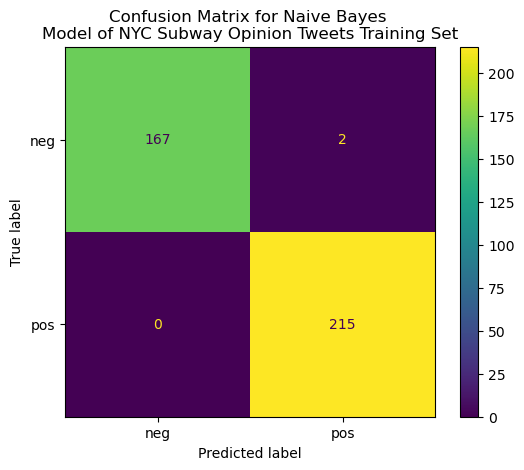

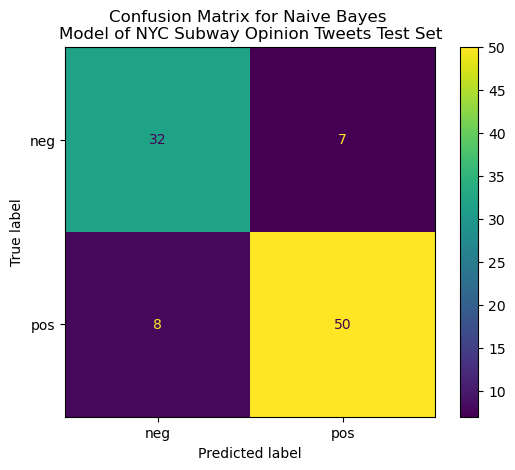

In [300]:
# Train Confusion Matrix
cm = confusion_matrix(y_train,yp_train,labels=model.classes_)
cm_plot = ConfusionMatrixDisplay(cm,display_labels=labels)
cm_plot.plot()
plt.title("Confusion Matrix for Naive Bayes \nModel of NYC Subway Opinion Tweets Training Set")
plt.savefig("../../501-project-website/images/CONFUSION-MX-NB-train-Opinion-Tweets.png")

# Test Confusion Matrix
cm = confusion_matrix(y_test,yp_test,labels=model.classes_)
cm_plot = ConfusionMatrixDisplay(cm,display_labels=labels)
cm_plot.plot()
plt.title("Confusion Matrix for Naive Bayes \nModel of NYC Subway Opinion Tweets Test Set")
plt.savefig("../../501-project-website/images/CONFUSION-MX-NB-test-Opinion-Tweets.png")

In [301]:
# EXTRANEOUS FUNCTION
def accuracy_report(y,ypred):
    accuracy = accuracy_score(y, ypred)
    print("Prediction accuracy:",accuracy*100)
    print("Mislabeled Points:",len(y)-accuracy*len(y),"out of",len(y),"points")


def model_predict(model,yp_train,yp_test):
    # Print accuracy
    print("Training Set:")
    accuracy_report(y_train,yp_train)
    print("First 30 predictions on trained set")
    print(y_train[0:30])
    print(yp_train[0:30])
    print("Errors:",yp_train[0:30]-y_train[0:30])
    # Print recall
    print("Recall:",recall_score(y_train,yp_train))


    # Print accuracy
    print("Test Set:")
    accuracy_report(y_test,yp_test)
    print("First 30 predictions on test set")
    print(y_test[0:30])
    print(yp_test[0:30])
    print("Errors:",yp_test[0:30]-y_test[0:30])
    # Print recall
    print("Recall:",recall_score(y_test,yp_test))